# Child Mind Institute — Problematic Internet Use 

In [40]:
#!pip install dataprep

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

from dataprep.eda import create_report

warnings.filterwarnings('ignore')

In [42]:
## Data Imports

df_train = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv')
df_test = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/test.csv')
df_dictionary = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/data_dictionary.csv')

#df_train_series = pd.read_parquet('/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet')
#df_test_series = pd.read_parquet('/kaggle/input/child-mind-institute-problematic-internet-use/series_test.parquet')

In [43]:
df_train.describe(include = 'all')

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
count,3960,3960,3960.000000,3960.000000,2555,2421.000000,3310,3022.000000,3027.000000,3076.000000,...,2728.000000,2730.000000,2733.000000,2736.000000,2618,2609.000000,2606.000000,3540,3301.000000,2736.000000
unique,3960,4,NaN,NaN,4,NaN,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,NaN,NaN,4,NaN,NaN
top,00008ff9,Spring,NaN,NaN,Spring,NaN,Spring,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Spring,NaN,NaN,Spring,NaN,NaN
freq,1,1127,NaN,NaN,697,NaN,929,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,712,NaN,NaN,985,NaN,NaN
mean,NaN,NaN,10.433586,0.372727,NaN,65.454771,NaN,19.331929,55.946713,89.038615,...,1.613636,1.158974,0.943652,27.896199,NaN,41.088923,57.763622,NaN,1.060588,0.580409
std,NaN,NaN,3.574648,0.483591,NaN,22.341862,NaN,5.113934,7.473764,44.569040,...,1.529178,1.343661,1.185460,20.338853,NaN,10.427433,13.196091,NaN,1.094875,0.771122
min,NaN,NaN,5.000000,0.000000,NaN,25.000000,NaN,0.000000,33.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,17.000000,38.000000,NaN,0.000000,0.000000
25%,NaN,NaN,8.000000,0.000000,NaN,59.000000,NaN,15.869350,50.000000,57.200000,...,0.000000,0.000000,0.000000,12.000000,NaN,33.000000,47.000000,NaN,0.000000,0.000000
50%,NaN,NaN,10.000000,0.000000,NaN,65.000000,NaN,17.937682,55.000000,77.000000,...,1.000000,1.000000,1.000000,26.000000,NaN,39.000000,55.000000,NaN,1.000000,0.000000
75%,NaN,NaN,13.000000,1.000000,NaN,75.000000,NaN,21.571244,62.000000,113.800000,...,2.000000,2.000000,1.000000,41.000000,NaN,46.000000,64.000000,NaN,2.000000,1.000000


## Exploratory Data Analysis

In [59]:
def analyze_missing_values(df):
    
    missing_percentage = df.isnull().mean() * 100
    missing_cols = missing_percentage[missing_percentage > 0].sort_values(ascending=False) 
    missing_dict = missing_cols.to_dict()
    
    return missing_dict
    
    

def plot_data(df):
    # Separar columnas numéricas y categóricas
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns

    # Configuración de la cuadrícula
    total_plots = len(numeric_cols) + len(categorical_cols)
    cols = 6  # Hasta 6 gráficos por fila
    rows = math.ceil(total_plots / cols)  # Número de filas necesarias

    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
    axes = axes.flatten()  # Aplanar matriz de ejes para acceso fácil

    # Densidad para columnas numéricas
    for i, col in enumerate(numeric_cols):
        sns.kdeplot(df[col].dropna(), ax=axes[i], fill=True)
        axes[i].set_title(f'Densidad {col}')
        axes[i].set_xlabel(col)

    # Histogramas para columnas categóricas
    for j, col in enumerate(categorical_cols):
        sns.histplot(df[col].dropna(), ax=axes[len(numeric_cols) + j])
        axes[len(numeric_cols) + j].set_title(f'Hist. {col}')
        axes[len(numeric_cols) + j].set_xlabel(col)

    # Ocultar ejes sobrantes si hay
    for k in range(total_plots, len(axes)):
        axes[k].axis('off')

    plt.tight_layout()
    plt.show()


In [53]:
missing_dict = analyze_missing_values(df_train)
missing_dict

{'PAQ_A-PAQ_A_Total': 88.0050505050505,
 'PAQ_A-Season': 88.0050505050505,
 'Fitness_Endurance-Time_Mins': 81.31313131313132,
 'Fitness_Endurance-Time_Sec': 81.31313131313132,
 'Fitness_Endurance-Max_Stage': 81.23737373737374,
 'Physical-Waist_Circumference': 77.32323232323233,
 'FGC-FGC_GSND_Zone': 73.18181818181819,
 'FGC-FGC_GSD_Zone': 73.15656565656565,
 'FGC-FGC_GSND': 72.87878787878788,
 'FGC-FGC_GSD': 72.87878787878788,
 'Fitness_Endurance-Season': 66.96969696969697,
 'PAQ_C-Season': 56.540404040404034,
 'PAQ_C-PAQ_C_Total': 56.540404040404034,
 'BIA-BIA_FFMI': 49.72222222222222,
 'BIA-BIA_FFM': 49.72222222222222,
 'BIA-BIA_Activity_Level_num': 49.72222222222222,
 'BIA-BIA_FMI': 49.72222222222222,
 'BIA-BIA_ECW': 49.72222222222222,
 'BIA-BIA_DEE': 49.72222222222222,
 'BIA-BIA_BMR': 49.72222222222222,
 'BIA-BIA_BMI': 49.72222222222222,
 'BIA-BIA_BMC': 49.72222222222222,
 'BIA-BIA_Fat': 49.72222222222222,
 'BIA-BIA_ICW': 49.72222222222222,
 'BIA-BIA_LDM': 49.72222222222222,
 'BIA-

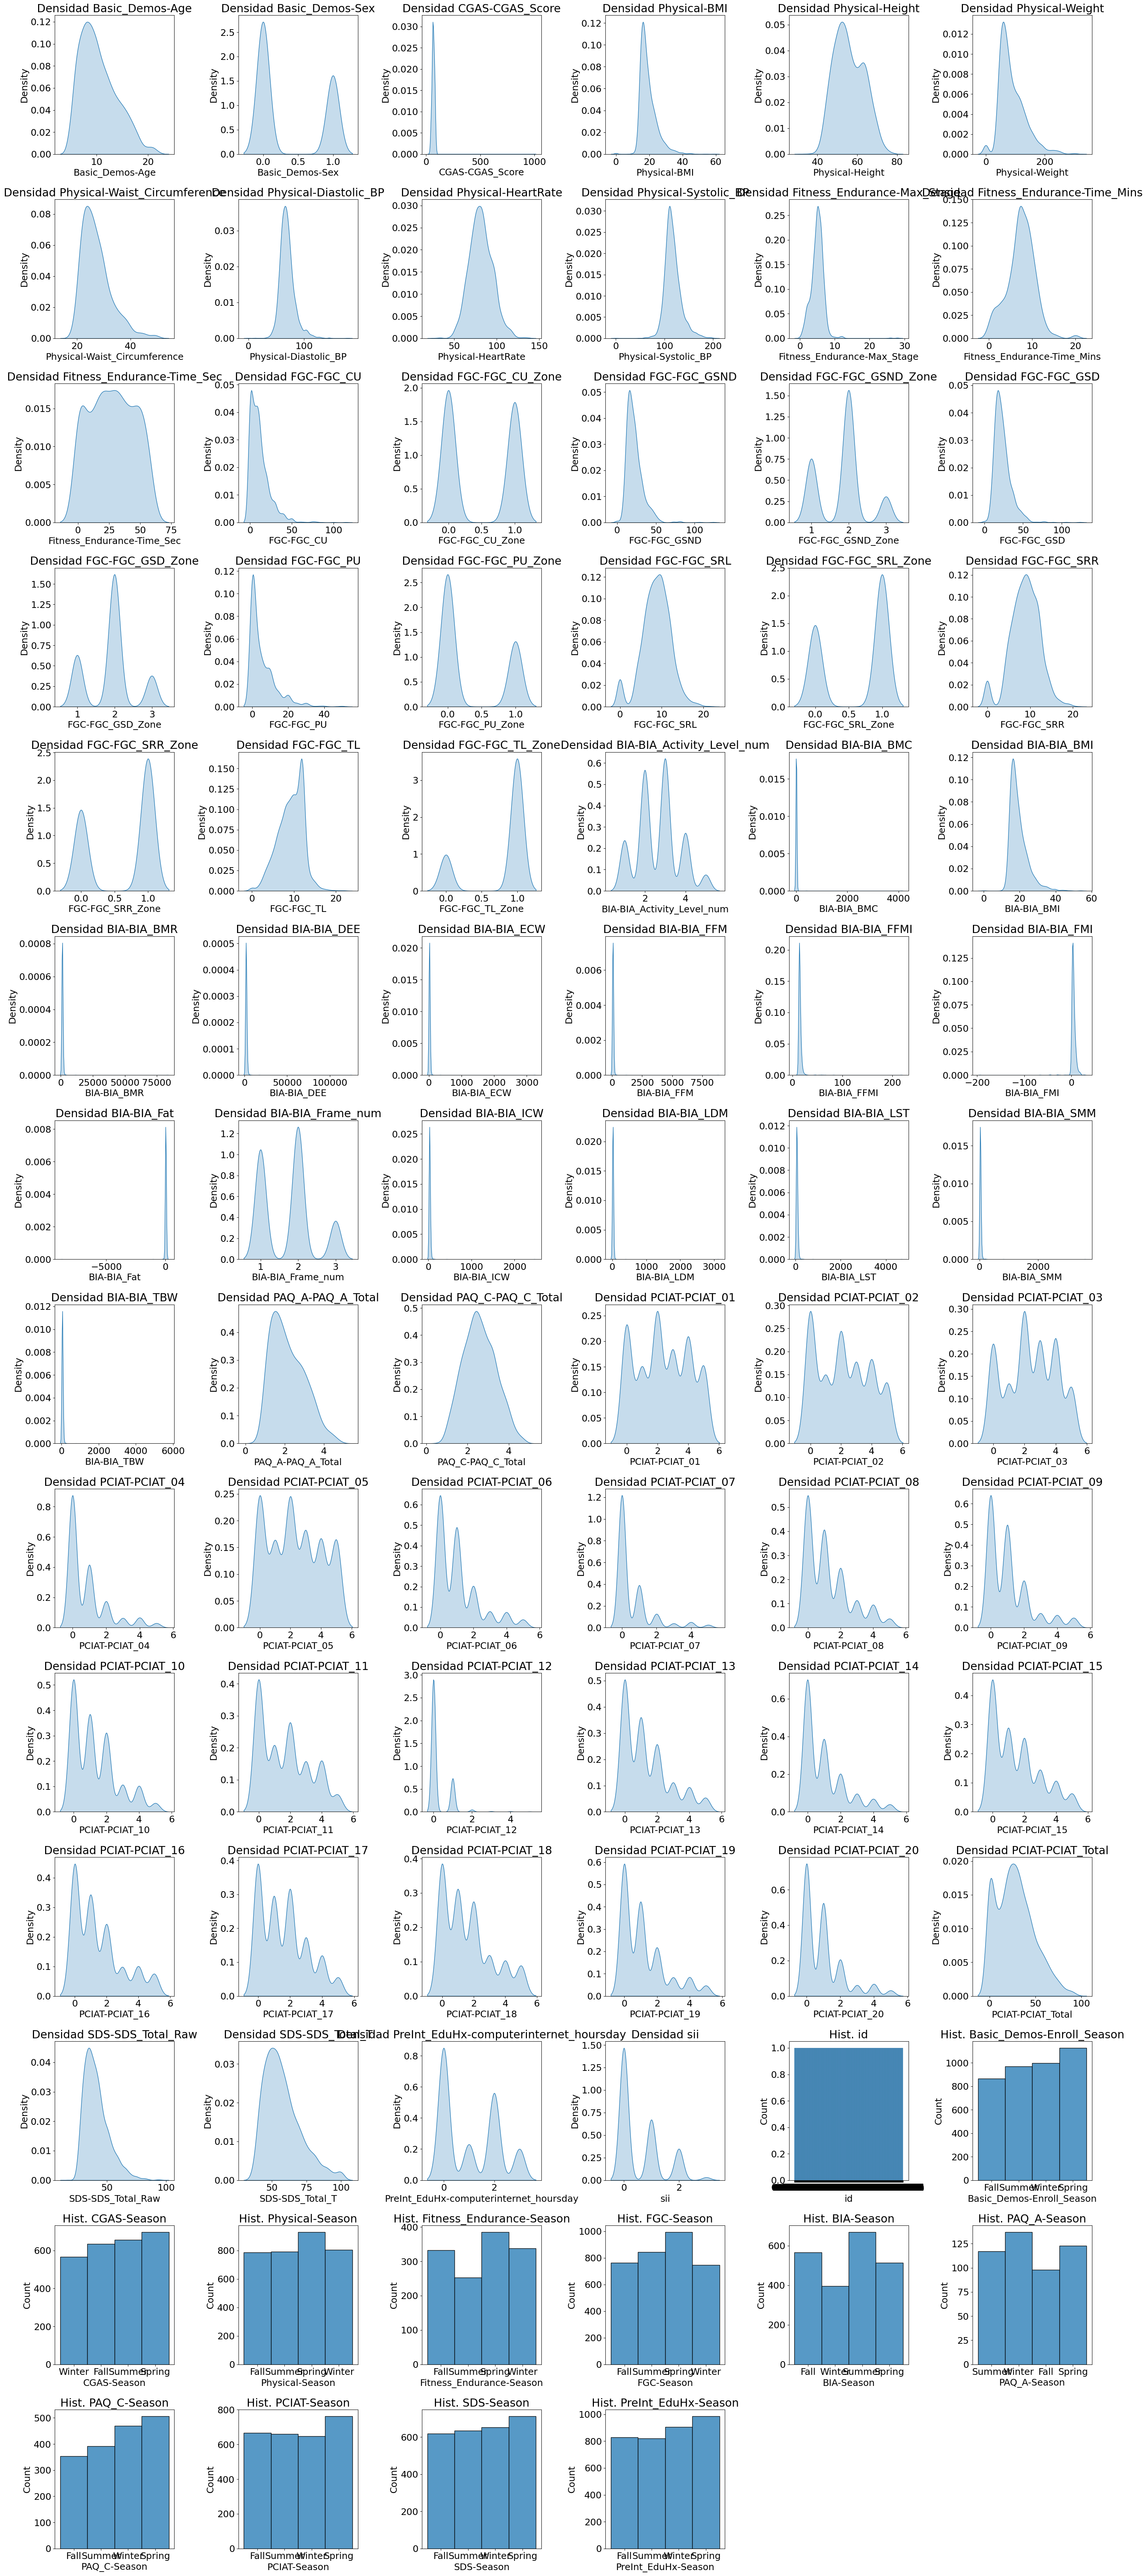

In [60]:
plot_data(df_train)